---
layout: default
title: "Deep Learning - CNN - Case Studies"
categories: deeplearning
permalink: /ML35/
order: 35
comments: true
---

In [1]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from plot_ann import ann
plt.rcParams["mathtext.fontset"] = "cm"
import pandas as pd
import cv2
from scipy.signal import convolve2d, correlate2d
from sklearn.datasets import load_digits
from mpl_flow import Flow
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import proj3d

Populating the interactive namespace from numpy and matplotlib


# Case Studies
The past few year of research on convolutional networks applied to computer vision has focused on the design of architectures of convolutional networks. Looking at some examples of CNN designs is useful for two main reasons: first, a number of problems have already been faced by someone else, and looking at how they resolved the problem is sometimes very insightful. Second, to gain intuitions on how to design your own network it is important to look at how others have done it before. Furthermore, a lot of these idea that were specifically designed for computer vision, are cross-contaminating with other fields. We will see:

* Some classic networks, some of these works laid the foundations of modern computer vision ML:
    * LeNet-5
    * AelxNet
    * VGG

* ResNet, or **residual network**, an example of building a very deep (152) layers neural network effectively. 
* A case study of **inception** neural network

## Classic networks
### LeNet-5
The goal of the network was to recognize handwritten digits, its architecture is shown in <a href="#fig:lenet5">the figure below</a>. LeNet-5 architecture starts with a $32 \times 32 \times 1$ grayscale image. In the first step a set of 6 $5 \times 5$ filters with stride $s=1$ and valid padding. This reduce the image to an $28 \times 28 \times 6$ output representation in CONV1 layer. Then the LeNet-5 applies average pooling with a $2 \times 2$ filter with stride $s=2$ that reduces the image to $14 \times 14 \times 6$. Right now a max-pooling is usually used but at the time, average pooling was more popular. The CONV2 layer is obtained by applying 16 $5 \times 5$  filters with stride $s=1$ and valid padding, which result in a $10 \times 10 \times 16$ output representation. When the LeNet-5 network was published padding was not used and in fact it is not applied to the CONV1 and CONV2 layers of this network. A second average pooling layer POOL2 is obtained by a $2 \times 2$ filter with stride $s=2$, which results in a $5\times 5 \times 16$ representation. This 3D matrix is reshaped in a $400 \times 1$ vector in the FC1 layer which is fully connected two FC2 ($120 \times 1$) and FC3 ($84 \times 1$). Finally a $10 \times 1$ output layer allow the multi-class classification. In modern days networks it would be a softmax classifier while in the LeNet-5 a less used classifier was employed.

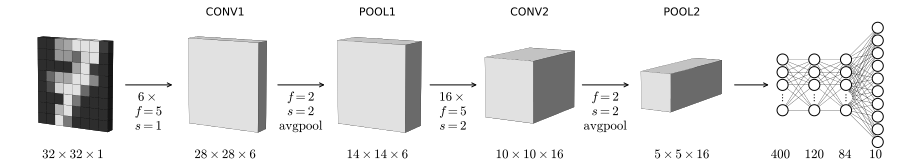

In [2]:

seven = load_digits().images[7]
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 6)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
ax4 = fig.add_subplot(gs[0, 3], projection='3d')
ax5 = fig.add_subplot(gs[0, 4], projection='3d')
ax6 = fig.add_subplot(gs[0, 5])


c = cm.get_cmap('gray')(np.rot90(seven, k=3).ravel()/15+.2).reshape(8, 1, 8, 4)

x, y, z = np.indices((8,1,8))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax1.voxels(voxels, edgecolor='k', facecolors=c, linewidth=0.1)
ax1.set_box_aspect([8, 1, 8])
ax1.text2D(0.5, 0, '$ 32 \\times 32 \\times 1$', fontsize=13, transform=ax1.transAxes, ha='center', va='top')

x, y, z = np.indices((1,1,1))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax2.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax2.set_box_aspect([28, 6, 28])
ax2.set_title('CONV1', fontsize=11)
ax2.text2D(0.5, 0, '$ 28 \\times 28 \\times 6$', fontsize=13, transform=ax2.transAxes, ha='center', va='top')

ax3.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax3.set_box_aspect([14, 6, 14])
ax3.set_title('POOL1', fontsize=11)
ax3.text2D(0.5, 0, '$ 14 \\times 14 \\times 6$', fontsize=13, transform=ax3.transAxes, ha='center', va='top')

ax4.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax4.set_box_aspect([10, 16, 10])
ax4.set_title('CONV2', fontsize=11)
ax4.text2D(0.5, 0, '$ 10 \\times 10 \\times 16$', fontsize=13, transform=ax4.transAxes, ha='center', va='top')

ax5.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax5.set_box_aspect([5, 16, 5])
ax5.set_title('POOL2', fontsize=11)
ax5.text2D(0.5, 0, '$ 5 \\times 5 \\times 16$', fontsize=13, transform=ax5.transAxes, ha='center', va='top')


ann([5, 5, 5, 10], ax=ax6, radius=2.5, node_labels=[*[*'   ', '$\\vdots$', ' ']*3], node_colors=list('kkkwk')*3, edge_colors=list('kkkwkkkkwkkkkwkwwwwwkkkwk'*3))
ax6.text(0, 0, '$400 \\quad \\; 120 \\quad \\; 84 \\quad \\; \\; 10$', fontsize=13, transform=ax6.transAxes, ha='left', va='top')
ax6.set_aspect('equal')

w1 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax1.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$6 \\times$\n$f=5$\n$s=1$', xy=(0, 0), xytext=(0.5, -1), xycoords=w1.arrow_patch, ha='center', va='top', fontsize=13)
w2 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax2.transAxes, textcoords=ax3.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=2$\n$s=2$\n$\\mathrm{avgpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w2.arrow_patch, ha='center', va='top', fontsize=13)
w3 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax3.transAxes, textcoords=ax4.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$16 \\times$\n$f=5$\n$s=2$', xy=(0, 0), xytext=(0.5, -1), xycoords=w3.arrow_patch, ha='center', va='top', fontsize=13)
w4 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax4.transAxes, textcoords=ax5.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=2$\n$s=2$\n$\\mathrm{avgpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w4.arrow_patch, ha='center', va='top', fontsize=13)
w5 = plt.annotate('', (.9, 0.5), (0, 0.5), xycoords=ax5.transAxes, textcoords=ax6.transAxes, arrowprops=dict(arrowstyle='<-'))

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.view_init(elev=10, azim=-60)
    ax.set_axis_off()

<i id="fig:lenet5">Architecture of the LeNet-5 classic network</i>

The LeNet-5 network is small by today's standard with approximately 60.000 thousand parameters in total, where nowadays we see networks in the range of 10-100 million parameters. Some other differences in the LeNet-5 architecture from modern standard in CNNs and neural networks in general is the activation function, where the sigmoid and tanh were used back then while we now almost always use ReLU. Furthermore the activation function was applied after pooling, while we now usually apply it before pooling. A couple of things are still designed in the same way in modern networks: as you go deeper in the network, there is a gradual shrink in height and width and the growth in the number of channels; convolutional and pooling layers alternate, even if not always with a 1:1 ratio. 

### AlexNet
The AlexNet has a similar architecture to LeNet-5 (<a href="#fig:alexnet">figure below</a>), in the sense that it alternates pooling layers to convolutional layers with the latest layers being fully connected. It is also similar in the fact that the number of channels grows further down in the network. However it has also many differences. AlexNet uses ReLU activation functions and makes use of *same* padding to prevent excessive shrinking in the width and height dimension. AlexNet has 1000 output classes assigned with a final softmax classifier layer. It has 60 million total parameters and this, together with the possibility of being trained on much more data were the reasons behind its remarkable performance.

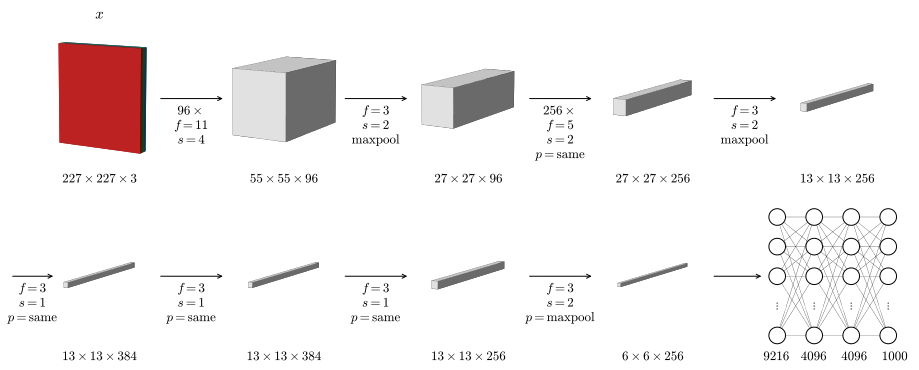

In [3]:
seven = load_digits().images[7]
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(2, 5)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
ax4 = fig.add_subplot(gs[0, 3], projection='3d')
ax5 = fig.add_subplot(gs[0, 4], projection='3d')
ax6 = fig.add_subplot(gs[1, 0], projection='3d')
ax7 = fig.add_subplot(gs[1, 1], projection='3d')
ax8 = fig.add_subplot(gs[1, 2], projection='3d')
ax9 = fig.add_subplot(gs[1, 3], projection='3d')
ax10 = fig.add_subplot(gs[1, 4])


c = cm.get_cmap('gray')(np.rot90(seven, k=3).ravel()/15+.2).reshape(8, 1, 8, 4)

x, y, z = np.indices((1, 3, 1))
r = (x >= 0) & (y == 2) & (z >= 0)
g = (x >= 0) & (y == 1) & (z >= 0)
b = (x >= 0) & (y == 0) & (z >= 0)
voxels = r | g | b 
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C0'
colors[g] = 'C2'
colors[b] = 'C3'
ax1.voxels(voxels, edgecolor='none', facecolors=colors, linewidth=0)
ax1.set_title('$x$', fontsize=15)
ax1.set_box_aspect([32, 4, 32])
ax1.text2D(0.5, 0, '$ 227 \\times 227 \\times 3$', fontsize=13, transform=ax1.transAxes, ha='center', va='top')

x, y, z = np.indices((1,1,1))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax2.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax2.set_box_aspect([55, 96, 55])
ax2.text2D(0.5, 0, '$ 55 \\times 55 \\times 96$', fontsize=13, transform=ax2.transAxes, ha='center', va='top')

ax3.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax3.set_box_aspect([27, 96, 27])
ax3.text2D(0.5, 0, '$ 27 \\times 27 \\times 96$', fontsize=13, transform=ax3.transAxes, ha='center', va='top')

ax4.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax4.set_box_aspect([27, 256, 27])
ax4.text2D(0.5, 0, '$ 27 \\times 27 \\times 256$', fontsize=13, transform=ax4.transAxes, ha='center', va='top')

ax5.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax5.set_box_aspect([13, 256, 13])
ax5.text2D(0.5, 0, '$ 13 \\times 13 \\times 256$', fontsize=13, transform=ax5.transAxes, ha='center', va='top')

ax6.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax6.set_box_aspect([13, 384, 13])
ax6.text2D(0.5, 0, '$13 \\times 13 \\times 384$', fontsize=13, transform=ax6.transAxes, ha='center', va='top')

ax7.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax7.set_box_aspect([13, 384, 13])
ax7.text2D(0.5, 0, '$13 \\times 13 \\times 384$', fontsize=13, transform=ax7.transAxes, ha='center', va='top')

ax8.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax8.set_box_aspect([13, 256, 13])
ax8.text2D(0.5, 0, '$13 \\times 13 \\times 256$', fontsize=13, transform=ax8.transAxes, ha='center', va='top')

ax9.voxels(voxels, edgecolor='k', facecolors='w', linewidth=0.1)
ax9.set_box_aspect([6, 256, 6])
ax9.text2D(0.5, 0, '$6 \\times 6 \\times 256$', fontsize=13, transform=ax9.transAxes, ha='center', va='top')


ann([5, 5, 5, 5], ax=ax10, radius=2.5, node_labels=[*[*'   ', '$\\vdots$', ' ']*4], node_colors=list('kkkwk')*4, edge_colors=list('kkkwkkkkwkkkkwkwwwwwkkkwk'*4))
ax10.text(0, 0, '$9216 \\quad 4096 \\quad \\; 4096 \\quad \\; 1000$', fontsize=13, transform=ax10.transAxes, ha='left', va='top')
ax10.set_aspect('equal')

w1 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax1.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$96 \\times$\n$f=11$\n$s=4$', xy=(0, 0), xytext=(0.5, -1), xycoords=w1.arrow_patch, ha='center', va='top', fontsize=13)
w2 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax2.transAxes, textcoords=ax3.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=2$\n$\\mathrm{maxpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w2.arrow_patch, ha='center', va='top', fontsize=13)
w3 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax3.transAxes, textcoords=ax4.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$256 \\times$\n$f=5$\n$s=2$\n$p=\\mathrm{same}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w3.arrow_patch, ha='center', va='top', fontsize=13)
w4 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax4.transAxes, textcoords=ax5.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=2$\n$\\mathrm{maxpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w4.arrow_patch, ha='center', va='top', fontsize=13)
w5 = plt.annotate('', (-.1, 0.5), (.2, 0.5), xycoords=ax6.transAxes, textcoords=ax6.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=1$\n$p=\\mathrm{same}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w5.arrow_patch, ha='center', va='top', fontsize=13)
w6 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax6.transAxes, textcoords=ax7.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=1$\n$p=\\mathrm{same}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w6.arrow_patch, ha='center', va='top', fontsize=13)
w7 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax7.transAxes, textcoords=ax8.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=1$\n$p=\\mathrm{same}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w7.arrow_patch, ha='center', va='top', fontsize=13)
w8 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax8.transAxes, textcoords=ax9.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=2$\n$p=\\mathrm{maxpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w8.arrow_patch, ha='center', va='top', fontsize=13)
w9 = plt.annotate('', (.9, 0.5), (0, 0.5), xycoords=ax9.transAxes, textcoords=ax10.transAxes, arrowprops=dict(arrowstyle='<-'))


for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.view_init(elev=10, azim=-60)
    ax.set_axis_off()

<i id="fig:alexnet">The AlexNet architecture</i>

The AlexNet has a fairly complicated architecture with many hyperparameters. This contrasts with the next classic network, the VGG-16

### VGG-16
A remarkable difference in the design of the VGG-16 network is that, compared to other networks it has a relatively simple architecture (<a href="#fig:vgg16">figure below</a>). When designing the VGG-16 network, the decision was taken to only employ convolutional layers with $f=3,s=1$ and *same* padding, and max-pooling layers with $f=2,s=2$. This really simplify the network architecture. The VGG-16 is deeper than the LeNet-5 and the AlexNet; it has 16 layers with parameters and a $\approx 138 M$ parameters in total, which makes it a large network even for today's standards. The VGG-16 architecture alternates 2 or 3 convolutional layers to a max-pooling layer, gradually increasing the number of channels and decreasing in height and width the representation. The number of channels increases in powers of 2, from 64 to 128, to 256 and finally to 512. Another even deeper version exists, the VGG-19 with 19 layer with parameters, but since it performs in most cases as the VGG-16, the latter is preferred since it has fewer parameters and it is thus faster to train. 

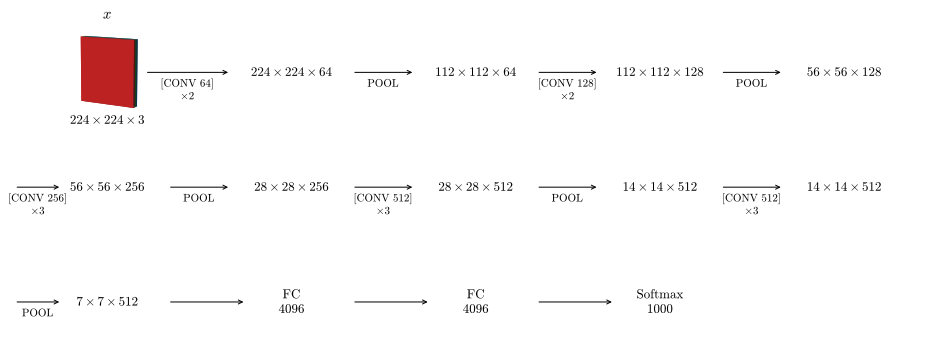

In [4]:
seven = load_digits().images[7]
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(3, 5)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])
ax6 = fig.add_subplot(gs[1, 0])
ax7 = fig.add_subplot(gs[1, 1])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[1, 3])
ax10 = fig.add_subplot(gs[1, 4])
ax11 = fig.add_subplot(gs[2, 0])
ax12 = fig.add_subplot(gs[2, 1])
ax13 = fig.add_subplot(gs[2, 2])
ax14 = fig.add_subplot(gs[2, 3])
ax15 = fig.add_subplot(gs[2, 4])


x, y, z = np.indices((1, 3, 1))
r = (x >= 0) & (y == 2) & (z >= 0)
g = (x >= 0) & (y == 1) & (z >= 0)
b = (x >= 0) & (y == 0) & (z >= 0)
voxels = r | g | b 
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C0'
colors[g] = 'C2'
colors[b] = 'C3'
ax1.voxels(voxels, edgecolor='none', facecolors=colors, linewidth=0)
ax1.set_title('$x$', fontsize=15)
ax1.set_box_aspect([32, 4, 32])
ax1.text2D(0.5, 0, '$ 224 \\times 224 \\times 3$', fontsize=13, transform=ax1.transAxes, ha='center', va='center')
ax2.text(0.5, 0.5, '$ 224 \\times 224 \\times 64$', fontsize=13, transform=ax2.transAxes, ha='center', va='center')
ax3.text(0.5, 0.5, '$ 112 \\times 112 \\times 64$', fontsize=13, transform=ax3.transAxes, ha='center', va='center')
ax4.text(0.5, 0.5, '$ 112 \\times 112 \\times 128$', fontsize=13, transform=ax4.transAxes, ha='center', va='center')
ax5.text(0.5, 0.5, '$ 56 \\times 56 \\times 128$', fontsize=13, transform=ax5.transAxes, ha='center', va='center')
ax6.text(0.5, 0.5, '$56 \\times 56 \\times 256$', fontsize=13, transform=ax6.transAxes, ha='center', va='center')
ax7.text(0.5, 0.5, '$28 \\times 28 \\times 256$', fontsize=13, transform=ax7.transAxes, ha='center', va='center')
ax8.text(0.5, 0.5, '$28 \\times 28 \\times 512$', fontsize=13, transform=ax8.transAxes, ha='center', va='center')
ax9.text(0.5, 0.5, '$14 \\times 14 \\times 512$', fontsize=13, transform=ax9.transAxes, ha='center', va='center')
ax10.text(0.5, 0.5, '$14 \\times 14 \\times 512$', fontsize=13, transform=ax10.transAxes, ha='center', va='center')
ax11.text(0.5, 0.5, '$7 \\times 7 \\times 512$', fontsize=13, transform=ax11.transAxes, ha='center', va='center')
ax12.text(0.5, 0.5, '$\\mathrm{FC}$\n$4096$', fontsize=13, transform=ax12.transAxes, ha='center', va='center')
ax13.text(0.5, 0.5, '$\\mathrm{FC}$\n$4096$', fontsize=13, transform=ax13.transAxes, ha='center', va='center')
ax14.text(0.5, 0.5, '$\\mathrm{Softmax}$\n$1000$', fontsize=13, transform=ax14.transAxes, ha='center', va='center')



w1 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax1.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$[\\mathrm{CONV}$ $64]$\n$\\times 2$', xy=(0, 0), xytext=(0.5, -1), xycoords=w1.arrow_patch, ha='center', va='top', fontsize=11)
w2 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax2.transAxes, textcoords=ax3.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$\\mathrm{POOL}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w2.arrow_patch, ha='center', va='top', fontsize=11)
w3 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax3.transAxes, textcoords=ax4.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$[\\mathrm{CONV}$ $128]$\n$\\times 2$', xy=(0, 0), xytext=(0.5, -1), xycoords=w3.arrow_patch, ha='center', va='top', fontsize=11)
w4 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax4.transAxes, textcoords=ax5.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$\\mathrm{POOL}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w4.arrow_patch, ha='center', va='top', fontsize=11)
w5 = plt.annotate('', (-.1, 0.5), (.2, 0.5), xycoords=ax6.transAxes, textcoords=ax6.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$[\\mathrm{CONV}$ $256]$\n$\\times 3$', xy=(0, 0), xytext=(0.5, -1), xycoords=w5.arrow_patch, ha='center', va='top', fontsize=11)
w6 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax6.transAxes, textcoords=ax7.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$\\mathrm{POOL}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w6.arrow_patch, ha='center', va='top', fontsize=11)
w7 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax7.transAxes, textcoords=ax8.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$[\\mathrm{CONV}$ $512]$\n$\\times 3$', xy=(0, 0), xytext=(0.5, -1), xycoords=w7.arrow_patch, ha='center', va='top', fontsize=11)
w8 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax8.transAxes, textcoords=ax9.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$\\mathrm{POOL}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w8.arrow_patch, ha='center', va='top', fontsize=11)
w9 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax9.transAxes, textcoords=ax10.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$[\\mathrm{CONV}$ $512]$\n$\\times 3$', xy=(0, 0), xytext=(0.5, -1), xycoords=w9.arrow_patch, ha='center', va='top', fontsize=11)
w10 = plt.annotate('', (-.1, 0.5), (.2, 0.5), xycoords=ax11.transAxes, textcoords=ax11.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$\\mathrm{POOL}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w10.arrow_patch, ha='center', va='top', fontsize=11)
w11 = plt.annotate('', (.9, 0.5), (.2, 0.5), xycoords=ax11.transAxes, textcoords=ax12.transAxes, arrowprops=dict(arrowstyle='<-'))
w12 = plt.annotate('', (.9, 0.5), (.2, 0.5), xycoords=ax12.transAxes, textcoords=ax13.transAxes, arrowprops=dict(arrowstyle='<-'))
w13 = plt.annotate('', (.9, 0.5), (.2, 0.5), xycoords=ax13.transAxes, textcoords=ax14.transAxes, arrowprops=dict(arrowstyle='<-'))


ax1.view_init(elev=10, azim=-60)
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]:
    ax.set_axis_off()

<i id="fig:vgg16">Architecture of the VGG-16 network, representations are only shown as their dimensions since the aspect of most of them would make the figure unreadable.</i>

## ResNets
Very deep neural networks are difficult to train because they tend to suffer from vanishing or exploding gradients (<a href="page:ML28">ML-28</a>). With **skip connection**, units in a layers are connected directly to units in much deeper (or shallower) layers skipping all intermediate layers. **Residual networks** (ResNets) are built with skip connections and they allow to train very deep neural networks with up to hundred of layers).

ResNets are built off of **residual blocks**. In a normal neural network for information to flow from an activation unit $a^{[l]}$ to $a^{[l+2]}$ it would need to undergo two linear and two non-linear transformations (<a href="#fig:resblock">figure below</a>), in a residual block $a^{[l]}$ takes a short cut and it is plainly added to $z^{[l+2]}$ before applying the second non-linearity function, so that $a^{[l+2]}=g(z^{[l+2]}+a^{[l]})$

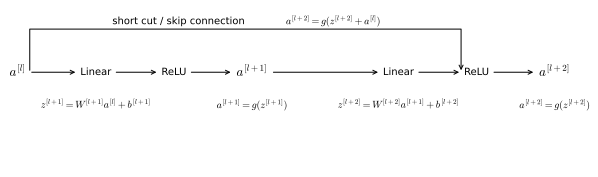

In [5]:
f = Flow(figsize=(10, 3))
f.node(1, label='$a^{[l]}$', bbox=dict(edgecolor='w'), fontsize=13)
f.node(2, label='Linear', bbox=dict(edgecolor='w'), fontsize=10, distance=.8)
f.node(3, label='ReLU', bbox=dict(edgecolor='w'), fontsize=10, distance=.8)
f.node(4, label='$a^{[l+1]}$', bbox=dict(edgecolor='w'), fontsize=13, distance=.8)
f.node(5, label='Linear', bbox=dict(edgecolor='w'), fontsize=10, distance=1.5)
f.node(6, label='ReLU', bbox=dict(edgecolor='w'), fontsize=10, distance=.8)
f.node(7, label='$a^{[l+2]}$', bbox=dict(edgecolor='w'), fontsize=13, distance=.8)
f.edge(1, 6, arrowprops=dict(connectionstyle='bar,fraction=0.1'), label='short cut / skip connection\t\t$a^{[l+2]}=g(z^{[l+2]}+a^{[l]})$')
f.node(8, label='$z^{[l+1]}=W^{[l+1]}a^{[l]}+b^{[l+1]}$', travel='s', startpoint=2, connect=False, distance=.05, bbox=dict(edgecolor='w'))
f.node(9, label='$a^{[l+1]}=g(z^{[l+1]})$', travel='s', startpoint=4, connect=False, distance=.05, bbox=dict(edgecolor='w'))
f.node(10, label='$z^{[l+2]}=W^{[l+2]}a^{[l+1]}+b^{[l+2]}$', travel='s', startpoint=5, connect=False, distance=.05, bbox=dict(edgecolor='w'))
f.node(11, label='$a^{[l+2]}=g(z^{[l+2]})$', travel='s', startpoint=7, connect=False, distance=.05, bbox=dict(edgecolor='w'));

<i id="fig:resblock">Concept of skip connection in a residual block. The flow of information in a normal neural network and the shortcut took by a residual block</i>

What the inventors of residual networks proved, was that by stacking many residual blocks into a residual network, it was possible to train much deeper networks compared to "plain networks" as they refer to into their manuscript. While training a deep neural network, as you increase the number of layers the error on the training set tends to decrease until a certain point. After a certain number of layers the training error tends to go back up, where in theory the deeper the network, the better the training error. In practice, due to vanishing or exploding gradient (<a href="page:ML28">ML-28</a>), performance deteriorates (<a href="#fig:resnetperf">figure below</a>, panel A). With a Resnet, even if number of layers get deeper the training error keeps getting lower as we expect, even with networks 100 layers deep. Recent research employed residual networks 1000 layers deep not suffering from performance deterioration despite the large number of layers. 

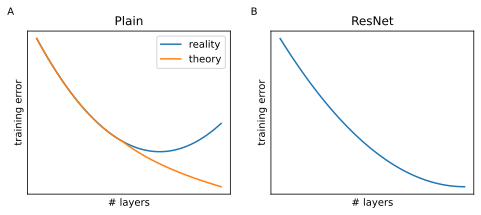

In [6]:
x1 = np.linspace(-1, .5)
x2 = np.linspace(-1, -.3)
x3 = np.linspace(.5, 1.3)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
ax, ax2 = axes
ax.plot(x1+.7, x1**2+.2, label='reality')
ax.plot(x2+.7, x2**2+.2, label='theory')
ax.plot(x3-.1, -np.log(x3)/2.4, c='C1')
ax.legend()
ax.set_title('Plain')

ax2.plot(np.linspace(-1, 0), np.linspace(-1, 0)**2)
ax2.set_title('ResNet')

for ax, l in zip(axes, 'AB'):
    ax.text(-.1, 1.1, l, transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('# layers')
    ax.set_ylabel('training error')

<i id="fig:resnetperf">Error on the training set as a function of the number of layers in a plain network (A) and in a residual network (B)</i>

The reason why ResNet allow very deep networks to not loose performance stands in their ability to easily represent the identity function, rendering the network simple when the data requires it. Let's see what that means: when $a^{[l]}$ skips the connection it is injected in the computation of $a^{[l+2]}$:

$$
\begin{split}
a^{[l+2]} & = g \left( z^{[l+2]} + a^{[l]}\right) \\
&=g(W^{[l+2]} a^{[l+1]} + b^{[l+2]} + a^{[l]})
\end{split}
$$

If we are using $L_2$ regularization weight decay that would tend to shrink the value of $W^{[l+2]}$ and, less importantly, of $b^{[l+2]}$. If both those elements tend to zero, then

$$
a^{[l+2]} = g (a^{[l]})
$$

Since we are using ReLU activation function, then $g (a^{[l]}) = a^{[l]}$, which means

$$
a^{[l+2]} = a^{[l]}
$$

This means that the identity function is easy for a residual block to learn. This, in turn means that having the two layers between $a^{[l]}$ and $a^{[l+2]}$ doesn't hurt performance, because when the data requires it, it will be easy for the network to just ignore those two layers. On the contrary, if the data is complex and requires a more complex representation, those layers can learn different and relevant parameters for the output representation. In fact, what goes wrong in very deep plain networks is that in deeper layers it becomes increasingly different to learn even identity functions and so the performance will decay if the network is too complex compared to the target function.

### ResNet requires dimension uniformity
One requirement of residual blocks is for $z^{[l+2]}$ and $a^{[l]}$ to have the same dimensions since they are added together. In order to achieve dimension uniformity usually *same* padding is used between convolutional layers. Pooling layers are positioned after the first, eight, sixteenth and twenty-eighth convolution. Each time a pooling layer is applied an adjustment to representation dimensions is required, in order to achieve the required dimension uniformity. To do that, a parameter matrix $W_s$ is multiplied to $a^{[l]}$. If $a^{[l+2]}$ has a side of $256$ and $a^{[l}$ a side of $128$, than $W_s \in \mathbb{R}^{256\times 128}$ so that $a^{[l]}$ will have side $256$. the parameter matrix $W_s$ could either be a matrix of learned parameters or a fixed matrix that just implements zero padding.

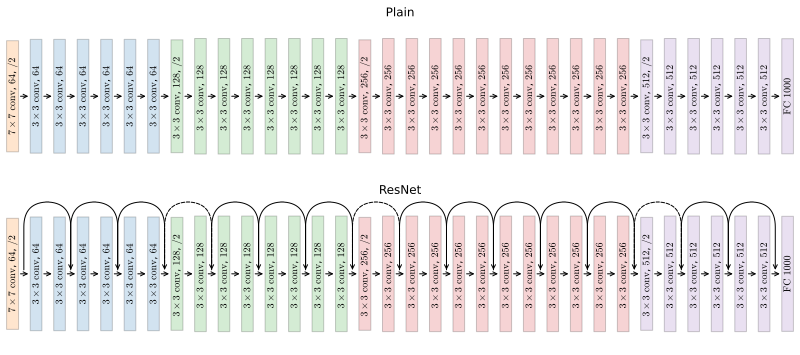

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(14, 6))
ax1, ax2 = ax
dims = [1, 6, 8, 12, 6]
f = [7, 3, 3, 3, 3]
c = [1, 0, 2, 3, 4]
ch = [64, 64, 128, 256, 512]
sc = range(0, 34, 2)

facecolors = sum([[f'C{color}']*dim for color, dim in zip(c, dims)], [])
filters = sum([['${0} \\times {0}$ $\\mathrm{{conv}}$'.format(filt)]*dim for filt, dim in zip(f, dims)], [])
channels = sum([['${}$'.format(c)]*dim for c, dim in zip(ch, dims)], [])
pools = ['$/2$']+['']*6+['$/2$']+['']*7+['$/2$']+['']*11+['$/2$']+['']*5
ax1.set_title('Plain')
ax2.set_title('ResNet')
labels = list(map(lambda l: ', '.join(l), zip(filters, channels, pools)))

f = Flow(ax=ax1)
for i, (c, l) in enumerate(zip(facecolors, labels)):
    f.node(i, label='{:^50}'.format(l.strip(', ')), rotation=90, bbox=dict(boxstyle='square', pad=0.1, fc=c, alpha=.2))
f.node(sum(dims), label='{:^44}'.format('$\\mathrm{FC}$ $1000$'), rotation=90, bbox=dict(boxstyle='square', pad=0.1, fc=c, alpha=.2));

edges = []
f = Flow(ax=ax2)
for i, (c, l) in enumerate(zip(facecolors, labels)):
    _, e = f.node(i, label='{:^50}'.format(l.strip(', ')), rotation=90, bbox=dict(boxstyle='square', pad=0.1, fc=c, alpha=.2))
    if e is not None:
        edges.append(e)
_, e = f.node(sum(dims), label='{:^44}'.format('$\\mathrm{FC}$ $1000$'), rotation=90, bbox=dict(boxstyle='square', pad=0.1, fc=c, alpha=.2))
edges.append(e)

for ii, (i, j) in enumerate(zip(edges[::2], edges[2::2])):
    ls = '--'if ii in [3, 7, 13] else '-'
    f.edge(i, j, arrowprops=dict(connectionstyle='arc,angleA=90,angleB=90,armA=70,armB=70,rad=25', ls=ls))

<i id="fig:resarchitecture">A plain CNN and a ResNet of 34 layers. All $3 \times 3$ convolutions have *same* padding so that dimensionality is uniform between $z^{[l+2]}$ and $a^{[l]}$. Pooling layers are positioned after the first, eight, sixteenth and twenty-eighth convolution. Pooling layers have the dimensions of the representation and are thus shown as $/2$ in the label of the convolutional layer to which they are applied.</i>

## Inception network
When designing CNN architecture, an idea that opens a new range of possibilities, is using a $1 \times 1$ convolution. It could seem that such a convolution would be like multiplying a matrix by a number, but the effect of $1 \times 1$ convolution are quite different.

### Network in network 
A $1 \times 1$ filter produces a representation with the same width and height of the input image, but the number of channels of the output representation is equal to the number of filters convolved. So, when convolving a $6 \times 6 \times 8$ input with one $1 \times 1$ filter, we will obtain a $6 \times 6 \times 1$ output representation. This means that when dealing with an input with more than one channel, all values in the channels at coordinates $i,j$ are linearly combined in a new value. When convolving a $6 \times 6 \times 8$ input with two $1 \times 1$ filters, we obtain a $6 \times 6 \times 2$ output representation (<a href="#fig:metanet">figure below</a>). 

Imagine that the convolution of the two $1 \times 1$ filters happens is performed in parallel. At each step of the convolution, each filter is moved to a new position and two values (one for each filter) are computed by linearly combining all values in the channels of the input representation with the single value of each filter. This operation can be represented as a fully connected network, with 8 input units (more generally, $n_c$ input units) and 2 output units (more generally, as many output units as the number of filters). This **inner network**, or **network in network**, outputs the values for the channels of a single position of the output representation and these outputs depend on a parameter matrix $W_\text{inner} \in \mathbb{R}^{ \text{#filters} \times n_c}$  

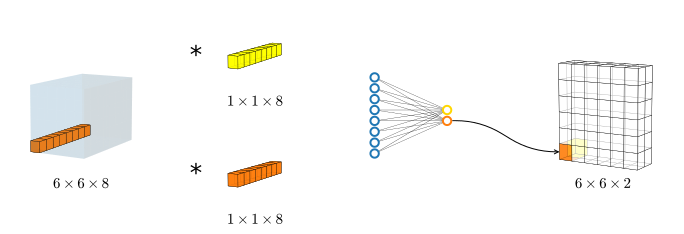

In [8]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[:, 0], projection='3d')
ax2 = fig.add_subplot(gs[:, 2])
ax4 = fig.add_subplot(gs[:, 3], projection='3d')
ax5 = fig.add_subplot(gs[0, 1], projection='3d')
ax6 = fig.add_subplot(gs[1, 1], projection='3d')
out = np.array(list(' '*16)).reshape(4, 4)

ann([8, 2], ax=ax2, height=.6, node_colors=['C0']*8+['gold', 'C1'], node_lw=2)
ax2.set_aspect('equal')

x, y, z = np.indices((6, 2, 6))
l1 = (x >= 0) & (y == 0) & (z >= 0)
l2 = (x >= 0) & (y == 1) & (z >= 0)
l2_11 = (x == 0) & (y == 0) & (z == 0)
l1_11 = (x == 0) & (y == 1) & (z == 0)
voxels = l1 | l2
colors = np.empty(voxels.shape, dtype=object)
colors[l1 | l2] = 'w'
colors[l2_11] = 'C1'
colors[l1_11] = 'yellow'
ax4.voxels(voxels, edgecolor='k', facecolors=colors, alpha=.7, linewidth=.3, shade=False)
ax4.set_box_aspect([6, 2, 6])
ax4.view_init(elev=10, azim=120)
ax4.set_axis_off()
ax4.text2D(0.5, 0, '$ 6 \\times 6 \\times 2$', fontsize=15, transform=ax4.transAxes, ha='center')
# ax4.text2D(0, 0.5, '=', fontsize=25, transform=ax4.transAxes, ha='center', va='center')

x, y, z = np.indices((1, 8, 1))
voxels = (x >= 0) & (y >=0) & (z >= 0)

ax5.voxels(voxels, edgecolor='k', facecolors='yellow',  linewidth=.3, shade=False, alpha=.9)
ax5.set_box_aspect([1, 8, 1])
ax5.view_init(elev=10, azim=120)
ax5.set_axis_off()
ax5.text2D(0.5, 0, '$1 \\times 1 \\times 8$', transform=ax5.transAxes, fontsize=15, ha='center')
ax5.text2D(-.1, 0.5, '*', transform=ax5.transAxes, fontsize=25, va='center', ha='center')

ax1.voxels(voxels, edgecolor='k', facecolor='C1', linewidth=.3,  shade=False)
x, y, z = np.indices((6, 8, 6))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
colors = np.full(voxels.shape, 'C0', dtype=object)
ax1.voxels(voxels, edgecolor='none', facecolors=colors, alpha=0.1)
ax1.set_box_aspect([6, 10, 6])
ax1.view_init(elev=10, azim=120)
ax1.set_axis_off()
ax1.text2D(0.5, 0, '$ 6 \\times 6 \\times 8$', fontsize=15, transform=ax1.transAxes, ha='center')

x, y, z = np.indices((1, 8, 1))
voxels = (x >= 0) & (y >=0) & (z >= 0)
ax6.voxels(voxels, edgecolor='k', facecolors='C1', linewidth=.3, shade=False, alpha=.9)
ax6.set_box_aspect([1, 8, 1])
ax6.view_init(elev=10, azim=120)
ax6.set_axis_off()
ax6.text2D(0.5, 0, '$1 \\times 1 \\times 8$', transform=ax6.transAxes, fontsize=15, ha='center')
ax6.text2D(-.1, 0.5, '*', transform=ax6.transAxes, fontsize=25, va='center', ha='center')

x2, y2, _ = proj3d.proj_transform(6.5,1,0.25, ax4.get_proj())

ax4.annotate('', (.65,.44), (x2, y2), xycoords=ax2.transAxes, textcoords=ax4.transData, 
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc,angleA=180,angleB=0,armA=30,armB=30,rad=25'), zorder=1000, va='center', ha='center')

for ax in [ax1, ax4, ax5, ax6]:
    ax.view_init(elev=10, azim=-60)
    ax.set_axis_off()

<i id="fig:metanet">Network in network concept represented for a single step of the convolution of a $6 \times 6 \times 8$ input with a pair of $1 \times 1$ filters, producing an network in the network, a fully connected layer with parameters $W \in \mathbb{R}^{2\times 8}$. The value of each output unit of this inner network is one position of one of the channels of the $6 \times 6 \times 2$ output representation</i>

While the architecture of the network in network described in [this article](https://arxiv.org/abs/1312.4400) is not widely used, the idea of network in network as being inspirational for many works, including inception network. 

$1 \times 1$ convolutions can be used to reduce the number of channels and speed up computation: when going deeper in a convolutional network the width and height tends to shrink due to the usage of *valid* padding or of pooling layers, while the number of channels tends to grow. A number of filters (smaller than the input $n_c$) can be used to reduce the number of channels while retaining the width and height of the output representation.

Alternatively, the number of $1 \times 1$ filters applied can leave $n_c$ unvaried while adding non-linearity and thus allowing to learn more complex functions.

## Inception networks
When designing a layer for a CNN you have to take decision on how to structure the architecture. You might have to pick a filter with specific dimensions or maybe a pooling layer. The inception network removes the need to choosing between these different options and do all at the same time.

The concept behind the inception network is to apply all relevant options to an input and let the optimization process decide what combination of filters or pooling better fits the data. 

Suppose we have a $28 \times 28 \times 192$ input. Instead of choosing the design of the layer that takes this input, combines multiple options in the same output representation by stacking them in different channel blocks. For example we could apply 64 $1 \times 1$ filters, which output a $28 \times  28 \times 64$ volume, 128  $ 3 \times 3 $ filters with *same* padding, which outputs a $28 \times 28 \times 128$ volume, 64  $ 5 \times 5 $ filters with *same* padding, which outputs a $28 \times 28 \times 64$ volume, and max-pooling which outputs a $28 \times 28 \times 32$ volume, granted that a *same* padding and a stride $s=1$ are used (<a href="#fig:inclayer">figure below</a>)

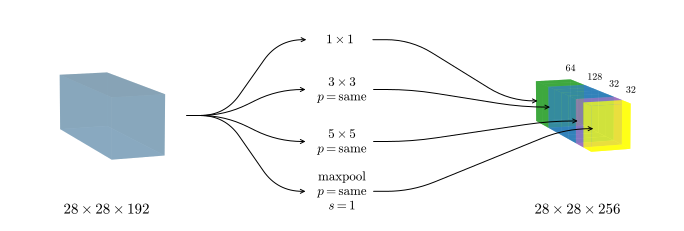

In [9]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2], projection='3d')

x, y, z = np.indices((1, 1, 1))
voxels = (x >= 0) & (y >=0) & (z >= 0)

colors = np.full(voxels.shape, 'C0', dtype=object)
ax1.voxels(voxels, edgecolor='none', facecolors=colors, alpha=0.3)
ax1.set_box_aspect([30, 90, 30])
ax1.view_init(elev=10, azim=120)
ax1.set_axis_off()
ax1.text2D(0.5, 0, '$ 28 \\times 28 \\times 192$', fontsize=15, transform=ax1.transAxes, ha='center')

t1 = ax2.text(0.5, .85, '{:^17}'.format('$1 \\times 1$'), transform=ax2.transAxes, ha='center', va='center', fontsize=13)
t2 = ax2.text(0.5, .62, '{:^20}'.format('$3 \\times 3$\n$p=\\mathrm{same}$'), transform=ax2.transAxes, ha='center', va='center', fontsize=13)
t3 = ax2.text(0.5, .38, '{:^20}'.format('$5 \\times 5$\n$p=\\mathrm{same}$'), transform=ax2.transAxes, ha='center',va='center', fontsize=13)
t4 = ax2.text(0.5, .15, '{:^20}'.format('$\\mathrm{maxpool}$\n$p=\\mathrm{same}$\n$s=1$'), transform=ax2.transAxes, ha='center', va='center', fontsize=13)

x, y, z = np.indices((1, 8, 1))
g = (x == 0) & (y >= 6) & (z == 0)
b = (x == 0) & (y >= 2) & (z == 0)
v = (x == 0) & (y >= 1) & (z == 0)
y = (x == 0) & (y >= 0) & (z == 0)
voxels = g | b | v | y
colors = np.empty(voxels.shape, dtype=object)
colors[y] = 'yellow'
colors[v] = 'C4'
colors[b] = 'C0'
colors[g] = 'C2'
ax3.voxels(voxels, edgecolor='none', facecolors=colors, alpha=.7, shade=False)
ax3.set_box_aspect([28, 120, 28])
ax3.view_init(elev=10, azim=120)
ax3.set_axis_off()
ax3.text2D(0.5, 0, '$ 28 \\times 28 \\times 256$', fontsize=15, transform=ax3.transAxes, ha='center')
ax3.text(1, 0, 1.4, '$32$', zorder=1000, va='top', ha='center')
ax3.text(1, 2, 1.4, '$32$', zorder=1000, va='top', ha='center')
ax3.text(1, 4.5, 1.4, '$128$', zorder=1000, va='top', ha='center')
ax3.text(1, 8, 1.4, '$64$', zorder=1000, va='top', ha='center')

ax2.set_axis_off()
for ax in [ax1, ax3]:
    ax.view_init(elev=10, azim=-110)
    ax.set_axis_off()
    
for t, y in zip([t1, t2, t3, t4], [0, 2, 6, 8][::-1]):
    ax1.annotate('', (-.2, .5), (.9, .5), textcoords=ax1.transAxes, xycoords=t, 
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc,angleA=0,angleB=180,armA=40,armB=30,rad=25', edgecolor='k'))
    x, y, _ = proj3d.proj_transform(0.1, y, 0.5, ax3.get_proj())
    ax3.annotate('', (x, y), (1.1, .5),  textcoords=t, xycoords=ax3.transData, 
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc,angleA=0,angleB=180,armA=40,armB=30,rad=25', edgecolor='k'), zorder=1000)

<i id="fig:inclayer">An inception layer. An input representation with 192 channels is subject to 3 filters and a pooling; the results of all the operations are stacked in a single output representation</i>

### Computational cost of an inception layer
The inception layer as formulated above has a problem of computational cost: just the cost of the volume resulting by the convolution of the $5 \times 5$ filters is to compute $120 \cdot 10^6$ multiplications. In fact, each cell of the $28 \times 28 \times 32$ output volume is computed by computing the convolution a $5 \times 5 \times 192$ filter. Luckily the concept of $1 \times 1$ convolution helps reduce the necessary computations by a factor of 10.

Instead of convolving the $5 \times 5$ filter directly, we could reduce the input volume (and consequently the computational cost of the operation) to $28 \times 28 \times 16$ by applying 16 $1 \times 1$ filters. This intermediate reduced volume, sometimes called the **bottleneck layer** (<a href="#fig:bottleneck">figure below</a>), can be then used as input for the original series of 32 $5 \times 5$ filters, which still produces a $28 \times 28 \times 32$ volume. The input and output dimensions have remained unchanged but the computational cost has drastically reduced: we now have to perform $[28 \cdot 28 \cdot 16 \cdot (1 \cdot 1) 192] + [28 \cdot 28 \cdot 32 \cdot 5 \cdot 5 \cdot 16]=12.4 \cdot 10^6$.

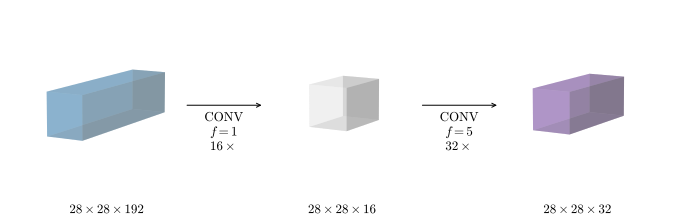

In [10]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax3 = fig.add_subplot(gs[0, 2], projection='3d')

x, y, z = np.indices((1,1,1))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax1.voxels(voxels, edgecolor='none', facecolors='C0', alpha=.3)
ax1.set_box_aspect([28, 120, 28])
ax1.text2D(0.5, 0, '$ 28 \\times 28 \\times 192$', fontsize=13, transform=ax1.transAxes, ha='center', va='top')

ax2.voxels(voxels, edgecolor='none', facecolors='w', alpha=0.3)
ax2.set_box_aspect([28, 16, 28])
ax2.text2D(0.5, 0, '$ 28 \\times 28 \\times 16$', fontsize=13, transform=ax2.transAxes, ha='center', va='top')
ax2.set_xlim(-1, 2)
ax2.set_zlim(-1, 2)

ax3.voxels(voxels, edgecolor='none', facecolors='C4', alpha=0.4)
ax3.set_box_aspect([28, 32, 28])
ax3.text2D(0.5, 0, '$ 28 \\times 28 \\times 32$', fontsize=13, transform=ax3.transAxes, ha='center', va='top')
ax3.set_xlim(-.8, 1.8)
ax3.set_zlim(-.8, 1.8)

w1 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax1.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$\\mathrm{CONV}$\n$f=1$\n$16\\times$', xy=(0, 0), xytext=(0.5, -1), xycoords=w1.arrow_patch, ha='center', va='top', fontsize=13)
w2 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax2.transAxes, textcoords=ax3.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$\\mathrm{CONV}$\n$f=5$\n$32 \\times$', xy=(0, 0), xytext=(0.5, -1), xycoords=w2.arrow_patch, ha='center', va='top', fontsize=13)

for ax in [ax1, ax2, ax3]:
    ax.view_init(elev=10, azim=-60)
    ax.set_axis_off()

<i id="fig:bottleneck">A bottleneck layer, a $1 \times 1$ convolution used to reduce the computational cost of a larger convolution</i>

It turns out that by implementing a bottleneck layer you can shrink down the representation significantly without apparently compromising the performance of the neural network.

### Building an inception network
The inception module takes as input the representation volume from a previous layer. Building upon the inception layer example used up until this point, to build a complete inception module a bottleneck layer is applied before the $3 \times 3$ and $5 \times 5$ convolutions to reduce the computational cost of the operation. The 64 $1 \times 1$ filters that produce the 64 channels in the final output don't require a bottleneck layer (they already are $1 \times 1$ filters). Finally, max-pooling is applied directly to the input volume, with the unusual configuration of *same* padding and stride $s=1$. This max-pooling layer produces a $28 \times 28 \times 192$ volume (where 192 is the $n_c$ of the input volume), that is shrunk to $28 \times 28 \times 32$ by applying 32 $1 \times 1$ filters. Finally all intermediates output volumes are concatenated together in a unique volume, which is the output of the inception module (<a href="#fig:incmod">figure below</a>) 

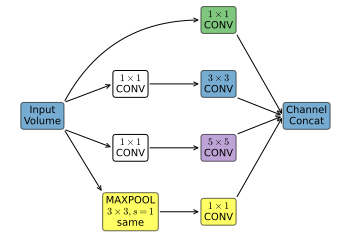

In [55]:
fig, ax = plt.subplots()
f = Flow(ax=ax)
f.node(1, label='Input\nVolume', bbox=dict(fc='C0', alpha=.6))
f.node(2, label='$1 \\times 1$\nCONV', travel='ne', distance=0.25, edge_kwargs=dict(headport='w'))
f.node(3, label='$1 \\times 1$\nCONV', travel='s', distance=.5, connect=False)
f.node(4, label='MAXPOOL\n$3\\times3,s=1$\nsame', travel='s', distance=.5, connect=False, bbox=dict(fc='yellow', alpha=.6))
f.node(5, label='$1 \\times 1$\nCONV', distance=0.25, bbox=dict(fc='yellow', alpha=.6))
f.node(6, label='$5 \\times 5$\nCONV', travel='n', connect=False, bbox=dict(fc='C4', alpha=.6), distance=.5)
f.node(7, label='$3 \\times 3$\nCONV', travel='n', connect=False, bbox=dict(fc='C0', alpha=.6), distance=.5)
f.node(8, label='$1 \\times 1$\nCONV', travel='n', connect=False, bbox=dict(fc='C2', alpha=.6), distance=.5)
f.node(9, label='Channel\nConcat', startpoint=1, connect=False, distance=.75, bbox=dict(fc='C0', alpha=.6))

f.edge(1, 3, headport='w')
f.edge(1, 4)
f.edge(3, 6)
f.edge(2, 7)
f.edge(1, 8, headport='w', arrowprops=dict(connectionstyle='arc3,rad=.3'))
f.edge(8, 9, headport='w')
f.edge(7, 9, headport='w')
f.edge(6, 9, headport='w')
f.edge(5, 9, headport='w');

<i id="fig:incmod">An inception module A more detailed description of the inception module architecture for the inception layer in <a href="#fig:inclayer">the inception layer figure</a>. Colors of the final output volume boxes reference the relevant volumes in <a href="#fig:inclayer">the inception layer figure</a>. Bottleneck layers are shown in white. The $1 \times 1$ convolution applied after the max-pooling layer, is used to shrink its channels, which would be equal to the $n_c$ of the input layer (192), but are reduced to 32 in the final output volume.</i>

multiple inception modules are chained together to build an inception network, where the output of a module is the input of the following module. In a full inception network sometimes, some additional pooling layers are placed immediately after an input of an inception module. The final layer of an inception network is usually a softmax layer. However there may be other softmax layers along a full inception network that branch out of the flow of the network to produce intermediate predictions. This is done to check if predictions produced by a smaller network are good enough or even better than those produced by the full network. In fact, branching out softmax layers can have a regularizing effect on predictions, since it produces output from smaller, less complex (sub-)networks. 

The inception network has been first proposed by Google with the name of GoogLeNet (in honor of the LeNet-5 network) in this [research article](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf) from 2015. From its publication newer versions of the inception network were published and (at least)  one of these versions combine the inception network and the ResNet, implementing skip-connections in the inception module.  